In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import ScalarFormatter

%matplotlib inline

In [3]:
star = pd.read_csv("dataset.csv")
star.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
star.shape

(240, 7)

In [5]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [6]:
star.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [7]:
star["Star type"].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [8]:
star["Star color"].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

In [9]:
star["Spectral Class"].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [10]:
corr = star.corr()
corr

C:\Users\danng\AppData\Local\Temp\ipykernel_11852\1454815149.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = star.corr()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


According to the table above, Absolute Magnitude is most correlated to the star type

Absolute magnitude(Mv)    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

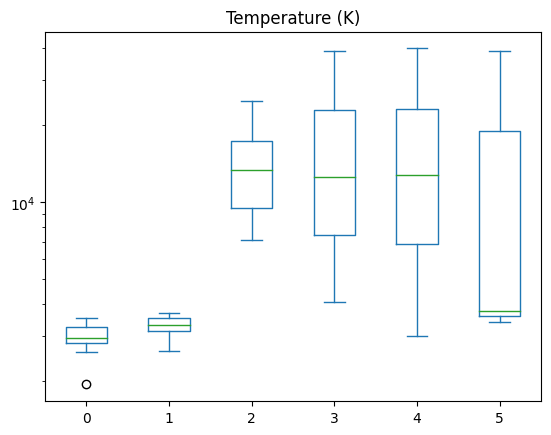

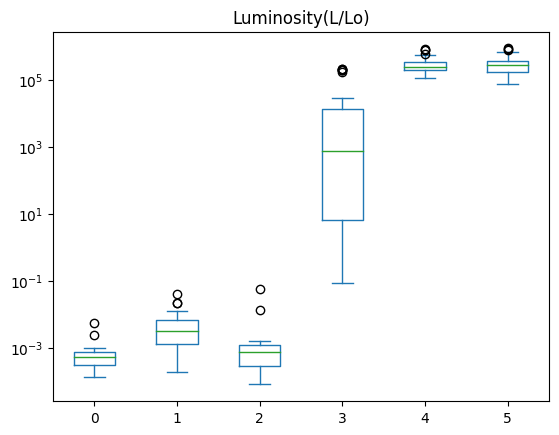

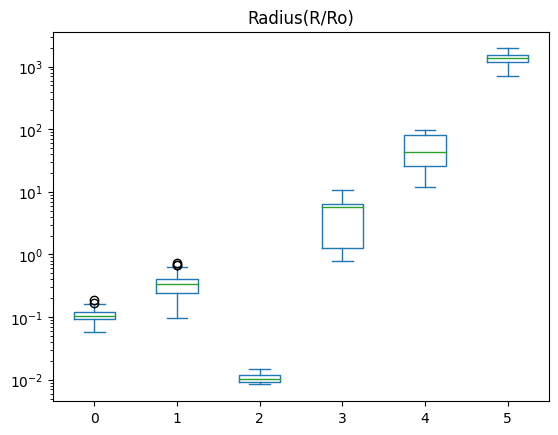

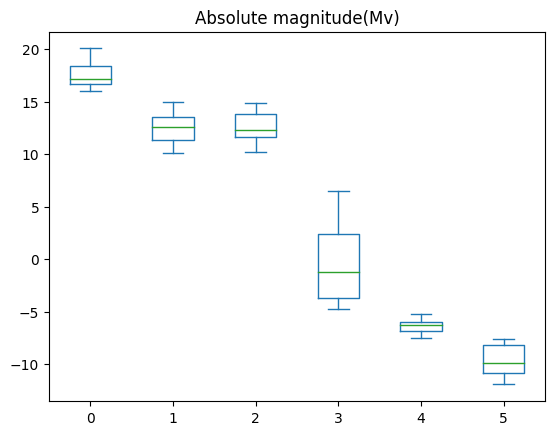

In [11]:
cols = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)']

for c in cols:
    star.plot.box(column=c, by='Star type', logy = True)

star.plot.box(column='Absolute magnitude(Mv)', by='Star type')


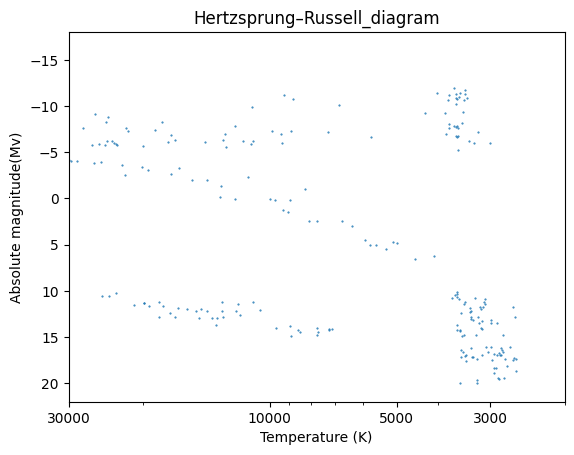

In [12]:
xTemp = np.array(star['Temperature (K)'])
yMag = np.array(star['Absolute magnitude(Mv)'])


fig, ax = plt.subplots()
ax.scatter(xTemp,yMag,s = 1, marker='.')
ax.set_xscale('log')
ax.set_ylim(22,-18)
ax.set_xlim(30000,2000)
ax.set_xticks([30000,10000,5000,3000])
ax.get_xaxis().set_major_formatter(ScalarFormatter())
ax.set_ylabel('Absolute magnitude(Mv)')
ax.set_xlabel('Temperature (K)')
ax.set_title('Hertzsprung–Russell_diagram')


plt.show()


Attempt to create a Random Forest Machine Learning Model from scikit learn to predict star type

In [13]:
#Create data set with input and output. I drop star color and spectral class
X = star.drop(columns=['Star type', 'Star color', 'Spectral Class'])
y = star['Star type']


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)

score = accuracy_score(y_test,predictions)
score

0.9722222222222222